In [83]:
import numpy as np
from scipy.integrate import quad 


# data generation
np.random.seed(0)
n = 1000
p = 50
SNR = 0.99

X_ori = np.random.standard_normal((n, p))
X_ori[:,0] = 1
beta = np.random.uniform(1, 10, p) * (-1)**np.random.binomial(1, 0.5, p)
beta[np.random.choice(np.arange(1, p), int(p*1/5), replace=False)] = 0
y_ = X_ori.dot(beta)
sigma_e = np.std(y_) * np.sqrt(1 - SNR) / np.sqrt(SNR)
e = np.random.standard_normal((n,)) * sigma_e
y = np.random.binomial(1, 1/(1 + np.exp(- (y_ + e))))

In [48]:
# sigma = 0.0
sigma_list = np.arange(0, 1.5, 0.1)
x, w = np.polynomial.hermite.hermgauss(10)
R = np.zeros((n,len(sigma_list)))
for j, sigma in enumerate(sigma_list):
    for i in range(n):
        X = X_ori[i,:]
        mu = X.dot(beta)
        R[i,j] = np.sum(w * 1/np.sqrt(2 * np.pi) * np.log(1 + np.exp(sigma * np.sqrt(2) * x + mu))) * np.sqrt(2) - np.log(1 + np.exp(mu))

In [49]:
R.sum(axis=0)

array([4.20222757e-12, 6.48493638e-02, 2.59318763e-01, 5.83175413e-01,
       1.03604115e+00, 1.61740389e+00, 2.32662936e+00, 3.16297218e+00,
       4.12558657e+00, 5.21353787e+00, 6.42581540e+00, 7.76134677e+00,
       9.21901309e+00, 1.07976641e+01, 1.24961325e+01])

In [91]:
param_list = [0.5, 0.75, 0.88, 0.95]
sigma_list = np.arange(0, 1.5, 0.1)
mu_list = X_ori.dot(beta)
x, w = np.polynomial.hermite.hermgauss(10)

R = np.zeros((len(param_list), len(sigma_list)))
R_q = np.zeros((len(param_list), len(sigma_list)))
for i, param in enumerate(param_list):
    ind = np.argmin(abs(1/(1 + np.exp(-mu_list)) - param))
    X = X_ori[ind,:]
    p_param = 1/(1 + np.exp(-X.dot(beta)))
    print(p_param)
    mu = X.dot(beta)

    for j, sigma in enumerate(sigma_list):
        R[i, j] = np.sum(w * 1/np.sqrt(2 * np.pi) * np.log(1 + np.exp(sigma * np.sqrt(2) * x + mu))) * np.sqrt(2) - np.log(1 + np.exp(mu))
        R_q[i, j] = 1/2 * p_param * (1 - p_param) * sigma**2

0.5050859785942226
0.7442813241325374
0.8764255366054027
0.9490537669949902


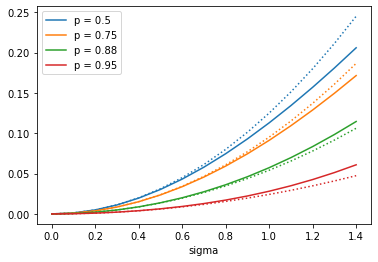

In [120]:
import matplotlib.pyplot as plt


label = ['p = 0.5','p = 0.75', 'p = 0.88', 'p = 0.95']
for i in range(4):
    plt.plot(sigma_list, R[i,:].T, color=f'C{i}', label=label[i])
    plt.plot(sigma_list, R_q[i,:].T, ":", color=f'C{i}')
plt.legend()
plt.xlabel('sigma')
plt.savefig('./result/R_q approximation LR-additive.png')

In [159]:
# dropout noise
# data generation
np.random.seed(0)
n = 1000
p = 100
SNR = 0.99

X_ori = np.random.standard_normal((n, p))
X_ori[:,0] = 1
beta = np.random.uniform(1, 3, p) * (-1)**np.random.binomial(1, 0.5, p)
beta[np.random.choice(np.arange(1, p), int(p*1/5), replace=False)] = 0
y_ = X_ori.dot(beta)
sigma_e = np.std(y_) * np.sqrt(1 - SNR) / np.sqrt(SNR)
e = np.random.standard_normal((n,)) * sigma_e
y = np.random.binomial(1, 1/(1 + np.exp(- (y_ + e))))


param_list = [0.5, 0.75, 0.88, 0.95]
delta_list = np.arange(0, 20) * 0.001
mu_list = X_ori.dot(beta)
x, w = np.polynomial.hermite.hermgauss(10)

R = np.zeros((len(param_list), len(delta_list)))
R_q = np.zeros((len(param_list), len(delta_list)))
for i, param in enumerate(param_list):
    ind = np.argmin(abs(1/(1 + np.exp(-mu_list)) - param))
    X = X_ori[ind,:]
    p_param = 1/(1 + np.exp(-X.dot(beta)))
    print(p_param)
    mu = X.dot(beta)

    for j, delta in enumerate(delta_list):
        sigma = np.sqrt(np.sum(beta**2 * X**2) * delta/(1 - delta))
        R[i, j] = np.sum(w * 1/np.sqrt(2 * np.pi) * np.log(1 + np.exp(sigma * np.sqrt(2) * x + mu))) * np.sqrt(2) - np.log(1 + np.exp(mu))
        R_q[i, j] = 1/2 * p_param * (1 - p_param) * sigma**2

0.4895410581118527
0.7509482835369976
0.8805560962871608
0.9498992984814671


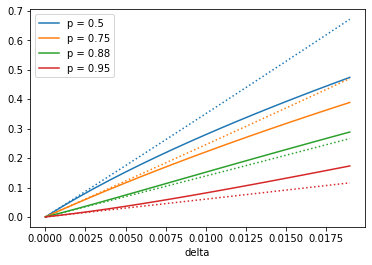

In [160]:
label = ['p = 0.5','p = 0.75', 'p = 0.88', 'p = 0.95']
for i in range(4):
    plt.plot(delta_list, R[i,:].T, color=f'C{i}', label=label[i])
    plt.plot(delta_list, R_q[i,:].T, ":", color=f'C{i}')
plt.legend()
plt.xlabel('delta')
plt.savefig('./result/R_q approximation LR-dropout.png')

In [152]:
sigma

2.206318505673891